# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [5]:
#importing modules
import pandas as pd
import requests
import os
import tweepy
from timeit import default_timer as timer
import json
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#importing uploaded file to pandas
df_archive=pd.read_csv("twitter-archive-enhanced.csv")
df_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [7]:
df_archive.source.values[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
#downloading data programmatically
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join(url.split("/")[-1]),mode="wb") as file:
    file.write(response.content)

In [9]:
#importing to pandas
df_prediction=pd.read_csv("image-predictions.tsv",sep="\t")
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [12]:
tweet_ids=df_archive.tweet_id.values
tweet_ids

array([892420643555336193, 892177421306343426, 891815181378084864, ...,
       666033412701032449, 666029285002620928, 666020888022790149])

In [13]:
if consumer_key !="":
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)


In [14]:
data=[]
with open("tweet_json.txt",mode="r") as file:
    for line in file:
          data.append(json.loads(line))

raw=pd.DataFrame(data)
raw.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

Now We have gathered all required data and  I am going to drop all columns except `id`,`favorite_count`,`retweet_count`,`created_at`

In [15]:
#list of columns being droped
drop_list=[column for column in raw.columns if column not in ['id','favorite_count','retweet_count','created_at']]
#droping columns
tweet=raw.drop(columns=drop_list)
#changin columns order
tweet=tweet[['id','created_at','favorite_count','retweet_count']]
tweet.head()

,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,34365,7142
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29787,5373
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22413,3541
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,37541,7343
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35865,7888


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# 1.Twitter Archive Enhanced

In [16]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Bailey        7
Toby          7
an            7
Buddy         7
Koda          6
Jack          6
Stanley       6
Dave          6
Leo           6
Jax           6
Rusty         6
Milo          6
Bella         6
Oscar         6
Scout         6
Chester       5
           ... 
Hamrick       1
Stella        1
Dietrich      1
Malikai       1
Tessa         1
Burt          1
Arnold        1
Cuddles       1
this          1
Rudy          1
Rover         1
Edgar         1
Rooney        1
Chuck         1
Tommy         1
Tayzie        1
Loomis        1
Marvin        1
Ziva          1
Stark         1
Theo          1
Hero          1
Cupid         1
Rose          1
Asher         1
Mary          1
Rizzo         1
JD            1
Boston        1
Darla         1
Name: name, Length: 957,

In [19]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
df_archive[pd.notnull(df_archive["in_reply_to_status_id"])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


# 2.Tweet_ API _DF

In [21]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 4 columns):
id                2328 non-null int64
created_at        2328 non-null object
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [22]:
tweet.head()

,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,34365,7142
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29787,5373
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,22413,3541
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,37541,7343
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35865,7888


In [23]:
tweet.tail()

,id,created_at,favorite_count,retweet_count
2323,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,91,37
2324,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,252,117
2325,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,102,36
2326,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,115,39
2327,666020888022790149,Sun Nov 15 22:32:08 +0000 2015,2315,431


# 3.Prediction_DF

In [24]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
df_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [27]:
df_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
sum(df_prediction.jpg_url.str.contains(".jpg")==False)

2

In [29]:
df_prediction[df_prediction.jpg_url.str.contains(".jpg")==False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-...,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


### Quality issues
1.Archive table:There null values in columns:`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp	`

2.Archive table: data type of timestamp column is object,but must be Datetime

3.Archive table;There are problems with  names in name column: 55 'a's and 745 'None's

4.Archive table:Some denomenators are not equal to 10 :some less, others more(also there unusual rating,because some images contain more tahn one dog)

5.Archive:There 2 rows that does not contain proper url of image

6.Archive:in several column null objects are in non-null format

7.Tweet:column `created_at` must be in Datetime

8.Archive:column `source` is not easily readable ,must be cleaned

## Tidiness

1. All tables must be part of one table
2. In Archive table, dog's stages is not in proper format 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [30]:
# Make copies of original pieces of data
tweet_clean=tweet.copy()
df_prediction_clean=df_prediction.copy()
df_archive_clean=df_archive.copy()

First of all,I am goint to drop row which contains retweets

In [31]:
df_archive_clean.drop(index=df_archive_clean[df_archive_clean.retweeted_status_id.notnull()].index,inplace=True)

## 1 Merging columns in Prediction 

#### Define:
Make function which checks whether values in `p1_dog`,`p2_dog`,`p3_dog` are true (Is it type of dog),according to that,chooses prediction and its confidence,then apply it to dataframe and drop unnecessary columns

#### Code

In [32]:
prediction=[]
confid=[]
def checker(dataframe):
    if dataframe["p1_dog"]==True:
        prediction.append(dataframe['p1'])
        confid.append(dataframe["p1_conf"])
    elif dataframe["p2_dog"]==True:
        prediction.append(dataframe['p2'])
        confid.append(dataframe["p2_conf"])
    elif dataframe["p3_dog"]==True:
        prediction.append(dataframe['p3'])
        confid.append(dataframe["p3_conf"])
    else:
        prediction.append(np.nan)
        confid.append(0)
df_prediction_clean.apply(checker,axis=1)
df_prediction_clean["prediction"]=prediction
df_prediction_clean["confidence"]=confid


In [33]:
df_prediction_clean.drop(columns=["p1","p2","p3","p1_dog","p2_dog","p3_dog","p1_conf","p2_conf","p3_conf","img_num"],inplace=True)

#### Test

In [34]:
df_prediction_clean.head()

,tweet_id,jpg_url,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


## 2.Data type issues

#### Define
use `to_datetime` to change data type

#### Code

In [35]:
#changing data type
df_archive_clean.timestamp=pd.to_datetime(df_archive_clean.timestamp)
tweet_clean.created_at=pd.to_datetime(tweet_clean.created_at)

#### Test

In [36]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

In [37]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 4 columns):
id                2328 non-null int64
created_at        2328 non-null datetime64[ns]
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 72.8 KB


## 3.Getting rid of unnecessary columns

#### Define
drop unnecessary columns (`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp	`)

#### Code

In [38]:
df_archive_clean.drop(columns=["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"],inplace=True)

#### Test

In [39]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## 4.Making source more clear

#### Define
Use RegEx for extracting data from HTML element

#### Code

In [40]:
df_archive_clean.source=df_archive_clean.source.str.extract(">(.+)<")[0]


#### Test

In [41]:
df_archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

## 5.Issues with nominators and denominators

#### Define
As we know that dogs are rated in this for (some nuober/10),we can use RegEx to get numerators and denumerators from text.The reason why numerators and denumeratos are not in proper format is that there more number in this formt(num/num).We must get right one

#### Code

In [42]:
df_archive_clean[df_archive.text.str.extract("(\d+/\d{2,4})")[0].str.split("/",expand=True)[0].isnull()].text.values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


array([ 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'], dtype=object)

While coding ,i realized that there is not rating in this row.So decidet to drop it

In [43]:
df_archive_clean.drop(index=516,inplace=True)

In [44]:
df_archive_clean.rating_numerator=df_archive_clean.text.str.extract("(\d+/\d{2,4})")[0].str.split("/",expand=True)[0].astype("int")
df_archive_clean.rating_denominator=df_archive_clean.text.str.extract("(\d+/\d{2,4})")[0].str.split("/",expand=True)[1].astype("int")

In [45]:
df_archive_clean[df_archive_clean.rating_denominator!=10].text.values

array([ "@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
       '@docmisterio account started on 11/15/15',
       'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
       'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
       'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
       'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
       'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
       'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq',
       "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
       "Here's a brigade of puppers. All look very

Above we can see that most people have inappropriate rating so i decided drop them

In [46]:
df_archive_clean.drop(index=df_archive_clean[df_archive_clean.rating_denominator!=10].index,inplace=True)

#### Test

In [47]:

df_archive_clean.rating_denominator.value_counts()

10    2154
Name: rating_denominator, dtype: int64

## 6.Changing "None " to "Null"

#### Define
replace Nones to Null objects with Replace method

#### Code

In [48]:
df_archive_clean.replace("None",np.nan,inplace=True)

#### Test

In [49]:
df_archive_clean.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN


## 7.Melting columns `doggo`	`floofer`	`pupper`	`puppo`

#### Define

#### Code

In [50]:
#melting and merging 
df_melting=df_archive_clean.melt(id_vars=["tweet_id"],value_vars=["doggo","floofer","pupper","puppo"],value_name="type")
df_melting.drop(index=df_melting[df_melting.type.isnull()].index,inplace=True)
df_archive_clean=pd.merge(df_archive_clean,df_melting,how="left")

In [51]:
#droping columns
df_archive_clean.drop(columns=["doggo","floofer","pupper","puppo","variable"],inplace=True)

#### Test

In [52]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166 entries, 0 to 2165
Data columns (total 9 columns):
tweet_id              2166 non-null int64
timestamp             2166 non-null datetime64[ns]
source                2166 non-null object
text                  2166 non-null object
expanded_urls         2112 non-null object
rating_numerator      2166 non-null int64
rating_denominator    2166 non-null int64
name                  1495 non-null object
type                  356 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.2+ KB


In [53]:
df_archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


## 8.png to jpg

#### Define
change data type of 2 images from png to jpg(Both jpg and png files are downloadable)

#### Code

In [54]:
df_prediction_clean.jpg_url=df_prediction_clean.jpg_url.str.replace(".png",".jpg")

#### Test

In [55]:
df_prediction_clean[df_prediction_clean.jpg_url.str.contains("jpg")==False]

,tweet_id,jpg_url,prediction,confidence


## 8.Merging tables

#### Define
merge all tables to one with `pd.merge`

#### Code

In [56]:
# I am choosing right merging as i need only those rows which has image
df_new=pd.merge(df_archive_clean,df_prediction_clean,on="tweet_id",how="right")


In [57]:
#merging dataframe got with API
df_final=pd.merge(df_new,tweet_clean,left_on="tweet_id",right_on="id",how="inner")

In [58]:
#Now we can drop extra columns
df_final.drop(columns=["created_at","id"],inplace=True)

#### Test

In [59]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2068
Data columns (total 14 columns):
tweet_id              2069 non-null int64
timestamp             1980 non-null datetime64[ns]
source                1980 non-null object
text                  1980 non-null object
expanded_urls         1980 non-null object
rating_numerator      1980 non-null float64
rating_denominator    1980 non-null float64
name                  1441 non-null object
type                  316 non-null object
jpg_url               2069 non-null object
prediction            1746 non-null object
confidence            2069 non-null float64
favorite_count        2069 non-null int64
retweet_count         2069 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 242.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [60]:
df_final.to_csv("twitter_archive_master.csv",index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [61]:
df_for_1_vis=df_final.source.value_counts()
df_for_1_vis

Twitter for iPhone    1942
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### 1.Insight:
1.The most popular source is Iphone (most user use Iphone)


### Visualization

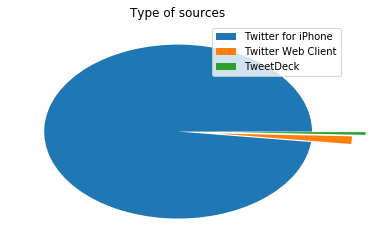

In [62]:
%matplotlib inline
plt.title("Type of sources")
plt.pie(df_for_1_vis,explode=[0,0.3,0.4])
plt.legend(df_for_1_vis.index)
plt.show()

### 2.Insight:
2.The most common dog is golden_retriever

In [63]:
df_forviz=df_final.prediction.value_counts()[0:10]


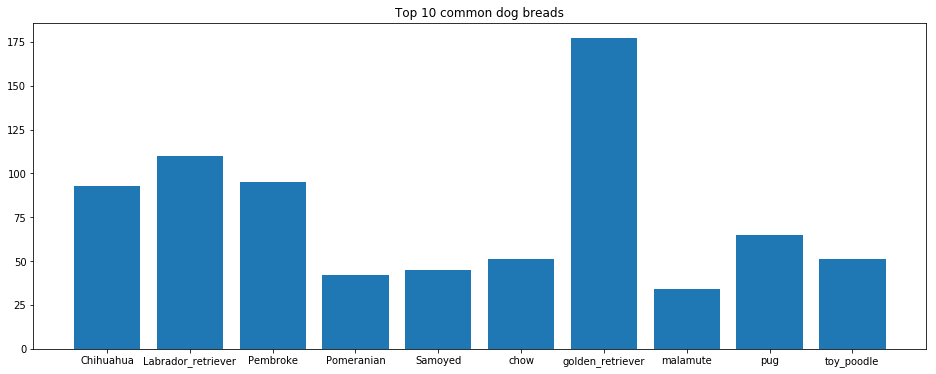

In [64]:
plt.figure(figsize=(16,6))

plt.bar(df_forviz.index,df_forviz.values)
plt.title("Top 10 common dog breads")
plt.show()

### 3.Insight:
3.There is strong postive correlation between favorite_count and retweet_count

In [65]:
df_final.corr()

,tweet_id,rating_numerator,rating_denominator,confidence,favorite_count,retweet_count
tweet_id,1.000000,0.028114,NaN,0.136683,0.571546,0.386620
rating_numerator,0.028114,1.000000,NaN,-0.022404,0.021832,0.023063
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN
confidence,0.136683,-0.022404,NaN,1.000000,0.075109,0.028134
favorite_count,0.571546,0.021832,NaN,0.075109,1.000000,0.862084
retweet_count,0.386620,0.023063,NaN,0.028134,0.862084,1.000000


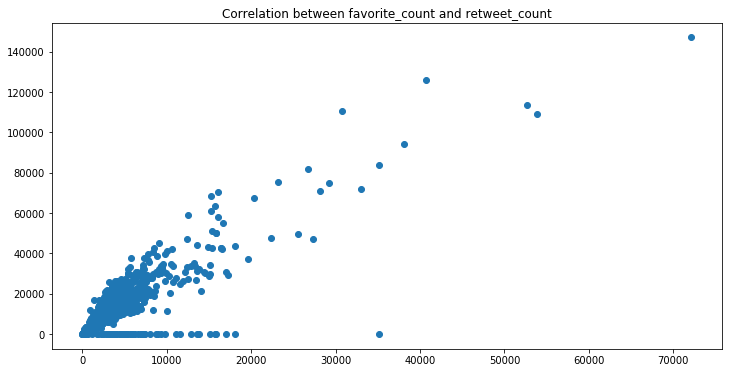

In [66]:
plt.figure(figsize=(12,6))
plt.title("Correlation between favorite_count and retweet_count")
plt.scatter(df_final.retweet_count,df_final.favorite_count)
plt.show()

In [67]:
df_final[df_final.prediction=="Pembroke"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,prediction,confidence,favorite_count,retweet_count
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,28413,6199
12,889665388333682689,2017-07-25 01:55:32,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13.0,10.0,NaN,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,Pembroke,0.966327,42754,8499
22,887473957103951883,2017-07-19 00:47:34,Twitter for iPhone,This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,13.0,10.0,Canela,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,Pembroke,0.809197,61175,15273
36,884441805382717440,2017-07-10 15:58:53,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,Pembroke,0.993225,24250,4860
44,882627270321602560,2017-07-05 15:48:34,Twitter for iPhone,This is Stanley. He has his first swim lesson ...,https://twitter.com/dog_rates/status/882627270...,13.0,10.0,Stanley,NaN,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,Pembroke,0.542982,25006,5161
52,880872448815771648,2017-06-30 19:35:32,Twitter for iPhone,Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,Pembroke,0.791416,19030,3256
68,877201837425926144,2017-06-20 16:29:50,Twitter for iPhone,This is Nelly. He graduated with his dogtorate...,https://twitter.com/dog_rates/status/877201837...,12.0,10.0,Nelly,NaN,https://pbs.twimg.com/media/DCxyahJWsAAddSC.jpg,Pembroke,0.931120,24224,4709
84,872486979161796608,2017-06-07 16:14:40,Twitter for iPhone,We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12.0,10.0,NaN,NaN,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,Pembroke,0.931861,36700,7838
91,870656317836468226,2017-06-02 15:00:16,Twitter for iPhone,This is Cody. He zoomed too aggressively and t...,https://www.gofundme.com/help-fix-codys-torn-a...,13.0,10.0,Cody,NaN,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,Pembroke,0.945495,11058,2239
95,869772420881756160,2017-05-31 04:27:59,Twitter for iPhone,"This is Dewey (pronounced ""covfefe""). He's hav...",https://twitter.com/dog_rates/status/869772420...,13.0,10.0,Dewey,NaN,https://pbs.twimg.com/media/DBINZcxXgAQ-R6P.jpg,Pembroke,0.980148,38571,8827


### 4.Insight: Effect of dog's stage to  favorites
3.In the visualization below,we can see that puppo is dog stage which has most favorites 

In [68]:
df=df_final.groupby("type")['favorite_count'].mean().sort_values(ascending=False)

AttributeError: Unknown property order

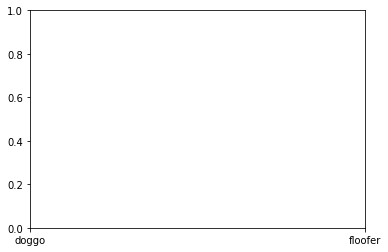

In [69]:
plt.bar(df.index,df.values,order=df.index)
plt.title("Dog' stage vs favorites")
plt.xlabel("Dog's stages")
plt.ylabel("Favorites")
plt.show()